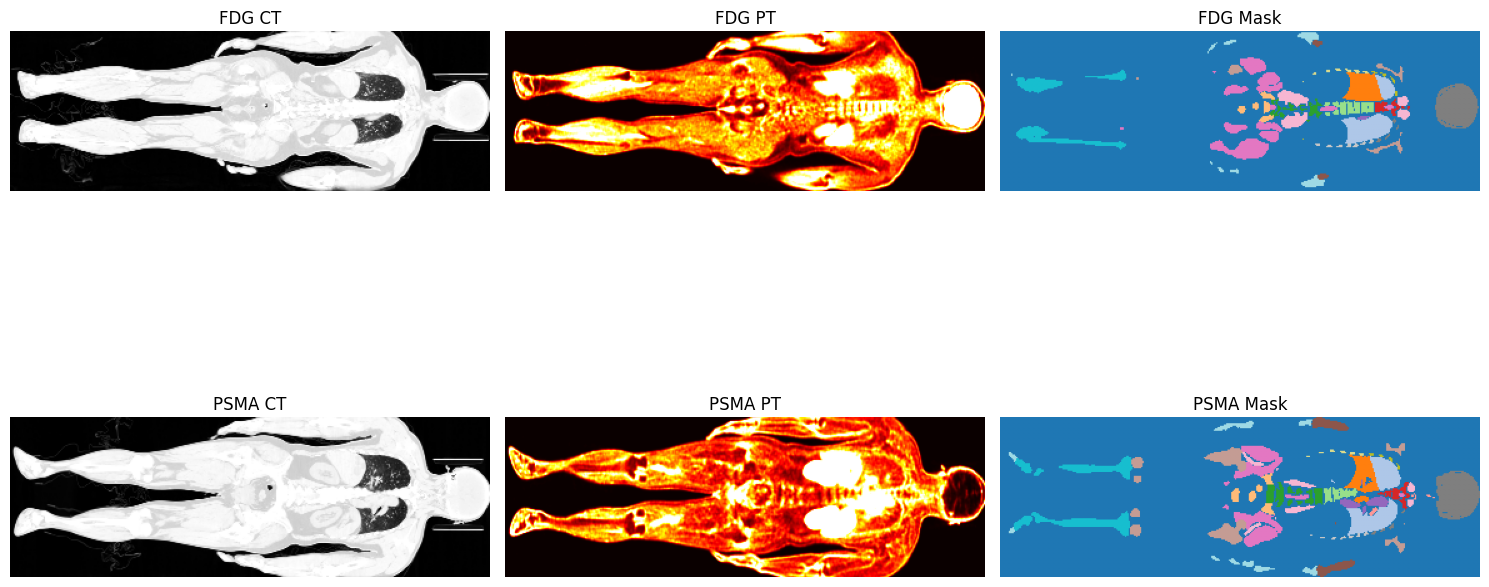

In [2]:
import h5py
import torch
import matplotlib.pyplot as plt





def load_h5(file_name: str):
    """
    Returns:
        fdg_ct, fdg_pt, fdg_mask,
        psma_ct, psma_pt, psma_mask
    """

    with h5py.File(file_name, 'r') as h5_file:
        fdg_ct = torch.from_numpy(h5_file['fdg_ct'][:])
        fdg_pt = torch.from_numpy(h5_file['fdg_pt'][:])
        fdg_mask = torch.from_numpy(h5_file['fdg_mask'][:])

        psma_ct = torch.from_numpy(h5_file['psma_ct'][:])
        psma_pt = torch.from_numpy(h5_file['psma_pt'][:])
        psma_mask = torch.from_numpy(h5_file['psma_mask'][:])

    return (
        fdg_ct,
        fdg_pt,
        fdg_mask,
        psma_ct,
        psma_pt,
        psma_mask,
    )


file = '/data/xiangcen/pet_gen/processed/batch1_h5/patient_0008.h5'


fdg_ct, fdg_pt, fdg_mask, psma_ct, psma_pt, psma_mask = load_h5(file)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))


slice_idx = 80


# FDG
axes[0, 0].imshow(fdg_ct[0, slice_idx, :, :], cmap='gray')
axes[0, 0].set_title('FDG CT')

axes[0, 1].imshow(fdg_pt[0, slice_idx, :, :], cmap='hot')
axes[0, 1].set_title('FDG PT')

axes[0, 2].imshow(fdg_mask[0, slice_idx, :, :], cmap='tab20')
axes[0, 2].set_title('FDG Mask')

# PSMA
axes[1, 0].imshow(psma_ct[0, slice_idx, :, :], cmap='gray')
axes[1, 0].set_title('PSMA CT')

axes[1, 1].imshow(psma_pt[0, slice_idx, :, :], cmap='hot')
axes[1, 1].set_title('PSMA PT')

axes[1, 2].imshow(psma_mask[0, slice_idx, :, :], cmap='tab20')
axes[1, 2].set_title('PSMA Mask')

# remove axes
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()